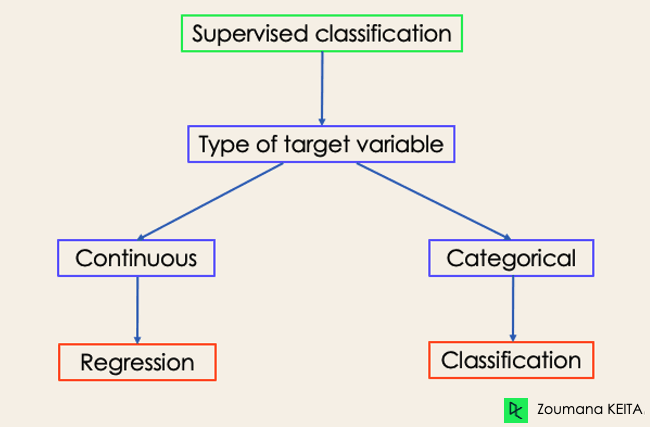

<div class="alert alert-info">
    <h1><strong>Introduction</strong></h1>
    <p>Classification is a fundamental task in supervised machine learning, where the goal is to predict the categorical class or label of an input data point based on its features. In other words, the algorithm learns to map input features to predefined classes from a given set of examples. These classes can be binary (e.g., yes/no, spam/not spam) or multiclass (e.g., cat, dog, bird).

During the training phase, the classification model is exposed to a labeled dataset, where each data point is associated with its corresponding class label. The model uses this training data to learn patterns and relationships between features and class labels, enabling it to make predictions on unseen data.</p>
    <br>
    <hr><b>Description</b><hr>
    <ui><li>The notebook includes exploratory data analysis (EDA) and feature engineering on a drugs dataset, followed by an in-depth explanation of classification using the Stochastic Gradient Descent (SGD) classifier and k-Nearest Neighbors (k-NN) classifier.</li></ui>
    <br>
    <hr><b>Performance Measures</b><hr>
    <ui><li>cross_val_score 
        <li>cross_val_predict
        <li>confusion_matrix
        <li>precision_score
        <li>recall_score
        <li>f1_score
        <li>precision_recall_curve
        <li>roc_curve
        <li>roc_auc_score
        <li>accuracy_score</li></ui>
    <br>
    <hr><b>Dataset</b><hr>
    https://www.kaggle.com/datasets/prathamtripathi/drug-classification
</div>



# 📦 Importing Dependencies


In [76]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")
sns.set_style(style="whitegrid")

In [77]:
df= pd.read_csv("/kaggle/input/drug-classification/drug200.csv")

In [78]:
df.sample(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
108,72,M,HIGH,NORMAL,9.677,drugB
157,53,M,LOW,HIGH,22.963,DrugY
77,26,F,HIGH,NORMAL,19.161,DrugY
81,64,M,NORMAL,HIGH,7.761,drugX
143,74,M,HIGH,NORMAL,15.436,DrugY


In [79]:
df.shape

(200, 6)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [81]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [82]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [83]:
df.duplicated().sum()

0

In [84]:
df.corr()

,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


In [85]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [86]:
df["Drug"].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

# 📊 Count Plot


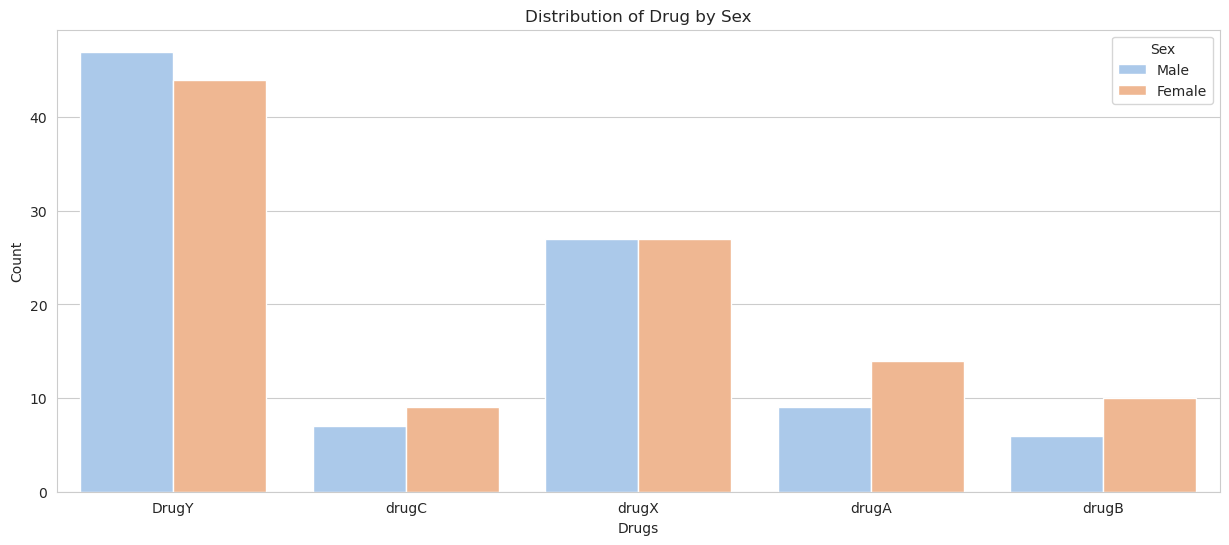

In [87]:
plt.figure(figsize=(15,6))

sns.countplot(data =df,x = "Drug", hue="Sex",palette="pastel")

plt.title("Distribution of Drug by Sex")
plt.xlabel("Drugs")
plt.ylabel("Count")
plt.legend(title="Sex", loc="upper right", labels=["Male", "Female"])
plt.show()

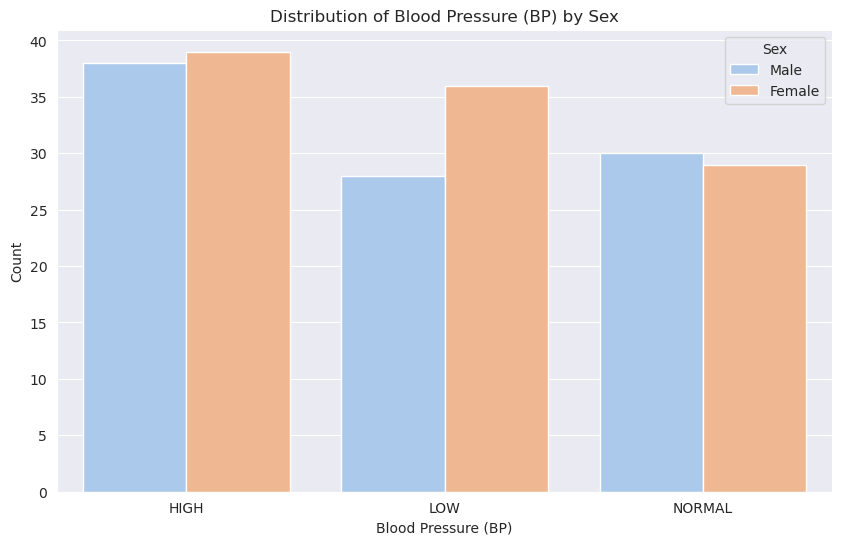

In [88]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="BP", hue="Sex", palette="pastel")
plt.title("Distribution of Blood Pressure (BP) by Sex")
plt.xlabel("Blood Pressure (BP)")
plt.ylabel("Count")
plt.legend(title="Sex", loc="upper right", labels=["Male", "Female"])
plt.show()

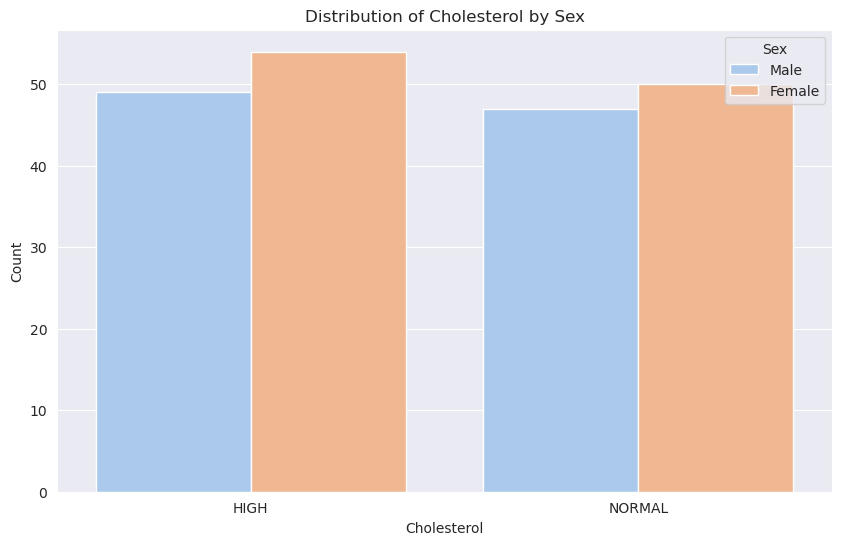

In [89]:
plt.figure(figsize=(10,6))

sns.countplot(data =df,x = "Cholesterol", hue="Sex",palette="pastel")

plt.title("Distribution of Cholesterol by Sex")
plt.xlabel("Cholesterol")
plt.ylabel("Count")
plt.legend(title="Sex", loc="upper right", labels=["Male", "Female"])
plt.show()

# 📊 Barplot


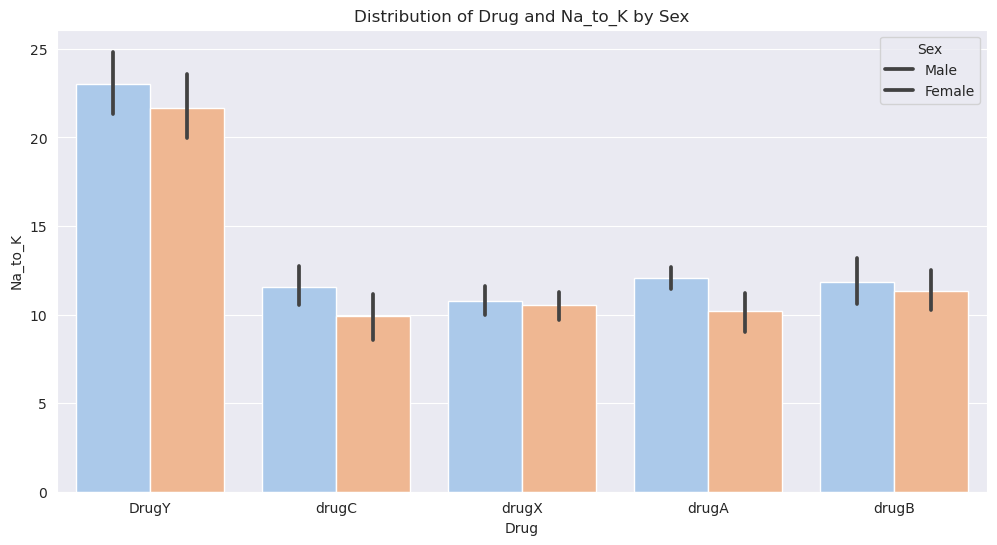

In [91]:
plt.figure(figsize=(12,6))
sns.barplot(data=df,x="Drug",y="Na_to_K",hue="Sex",palette="pastel")
plt.title("Distribution of Drug and Na_to_K by Sex")
plt.xlabel("Drug")
plt.ylabel("Na_to_K")
plt.legend(title="Sex", loc="upper right", labels=["Male", "Female"])
plt.show()

# 📊 Boxplot


<Axes: xlabel='Drug', ylabel='Na_to_K'>

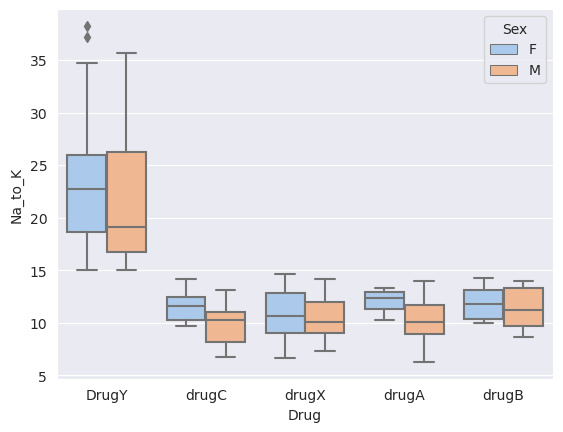

In [92]:
sns.boxplot(data=df,x="Drug",y="Na_to_K",hue="Sex",palette="pastel")

# 📈 Distplot (Distribution Plot)


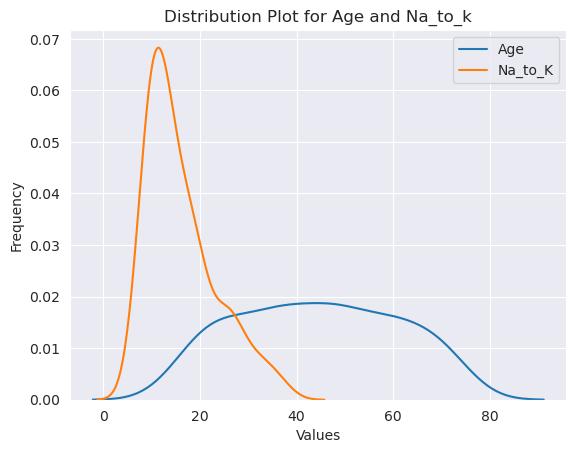

In [93]:
sns.distplot( x=df['Age'], hist=False, label='Age', bins=10)
sns.distplot( x=df['Na_to_K'],hist=False, label='Na_to_K', bins=10)
plt.title("Distribution Plot for Age and Na_to_k")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# 🔧 Feature Engineering


In [94]:
df.sample(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
62,67,M,LOW,NORMAL,20.693,DrugY
36,32,M,HIGH,NORMAL,9.445,drugA
108,72,M,HIGH,NORMAL,9.677,drugB
133,24,M,NORMAL,HIGH,25.786,DrugY
105,37,M,LOW,NORMAL,8.968,drugX


<div class="alert alert-warning">
Scaling is not always required for the SGD classifier, as it is known to be less sensitive to feature scaling compared to some other algorithms like Support Vector Machines (SVM) or k-Nearest Neighbors (k-NN). However, it is generally a good practice to perform feature scaling for most machine learning algorithms, including SGD, as it can lead to improved convergence and performance.
</div>

In [136]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [150]:
X=df.drop("Drug",axis=1)
y=df["Drug"]

In [151]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [152]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y_encoded,test_size=0.5,random_state=42)

In [153]:
trans_x = ColumnTransformer(transformers=[
    ("trf1", OneHotEncoder(sparse=False, drop="first"), ["Sex", "BP", "Cholesterol"]),
    ("trf2", StandardScaler(), ['Age', 'Na_to_K'])
], remainder="passthrough")

In [154]:
X_train_new = trans_x.fit_transform(X_train)
X_test_new = trans_x.fit_transform(X_test)

<div class="alert alert-danger">
    <h1><strong>Binary Classification</strong></h1>
    <p>In a binary classification task, the goal is to classify the input data into two mutually exclusive categories. The training data in such a situation is labeled in a binary format: true and false; positive and negative; O and 1; spam and not spam, etc. depending on the problem being tackled.</p>
    
</div>

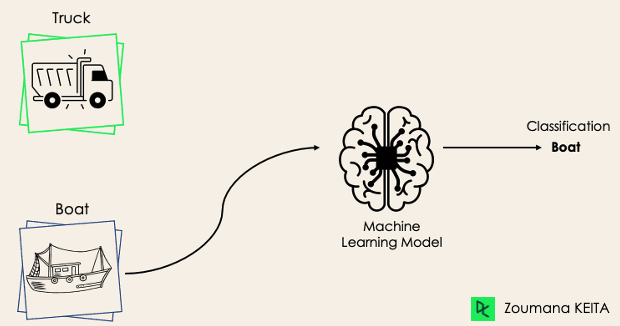


<div class="alert alert-danger">
     A good place to start is with a Stochastic Gradi‐
ent Descent (SGD) classifier, using Scikit-Learn’s SGDClassifier class. This classifier
has the advantage of being capable of handling very large datasets efficiently. This is
in part because SGD deals with training instances independently, one at a time
(which also makes SGD well suited for online learning), as we will see later. Let’s cre‐
ate an SGDClassifier and train it on the whole training set:
</div>

In [155]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier()
sgd.fit(X_train_new,y_train)

SGDClassifier()

<div class="alert alert-danger">
    The SGDClassifier relies on randomness during training (hence
the name “stochastic”). If you want reproducible results, you
should set the random_state parameter.

</div>

In [156]:
y_pred = sgd.predict(X_test_new)

<div class="alert alert-danger">
    <h1><strong>Performance Measures</strong></h1>
    <br>
    <hr><bi>Measuring Accuracy Using Cross-Validation</bi><hr>
</div>

In [157]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd,X_train_new,y_train,cv=10,scoring="accuracy")

array([1. , 0.9, 0.9, 1. , 0.8, 0.9, 0.8, 1. , 1. , 0.9])

<div class="alert alert-danger">
    <h1><strong>Confusion Matrix</strong></h1>
    <ui><li>A much better way to evaluate the performance of a classifier is to look at the confusion    matrix. The general idea is to count the number of times instances of class A are
classified as class B.</li></ui>
   <ui><li>To compute the confusion matrix, you first need to have a set of predictions so that
they can be compared to the actual targets</li></ui>
</div>

In [158]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_pred = cross_val_predict(sgd,X_train_new,y_train,cv=10)
cm = confusion_matrix(y_train,y_pred)
cm

array([[45,  0,  0,  2,  2],
       [ 1,  5,  1,  0,  0],
       [ 1,  2,  5,  0,  0],
       [ 0,  0,  0,  9,  0],
       [ 2,  0,  0,  0, 25]])

<Axes: >

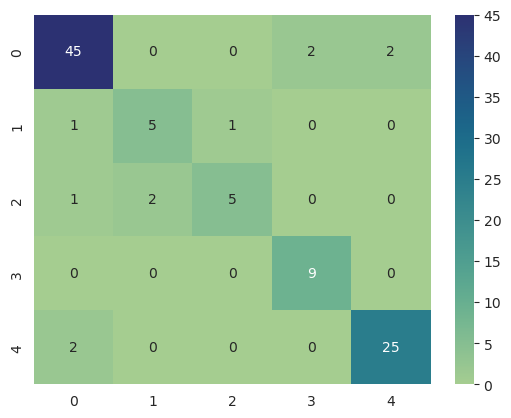

In [159]:
sns.heatmap(cm,cmap="crest",annot=True)

<div class = "alert alert-danger">
    <h1><strong>Multi-Class Classification</strong></h1>
<ui><li>This is a 5x5 matrix representing the classification performance of a model on a multiclass classification task. Each row of the matrix corresponds to the true class, while each column corresponds to the predicted class. The diagonal elements represent the correct predictions, and off-diagonal elements represent misclassifications.</li></ui>
    
<ui><li>Whereas binary classifiers distinguish between two classes, multiclass classifiers (also
called multinomial classifiers) can distinguish between more than two classes.
Some algorithms (such as SGD classifiers, Random Forest classifiers, and naive Bayes
classifiers) are capable of handling multiple classes natively. Others (such as Logistic
Regression or Support Vector Machine classifiers) are strictly binary classifiers. How‐
ever, there are various strategies that you can use to perform multiclass classification
with multiple binary classifiers.</li></ui>

</div>

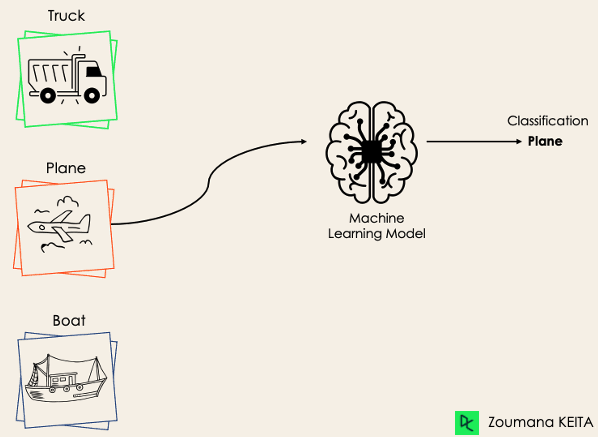

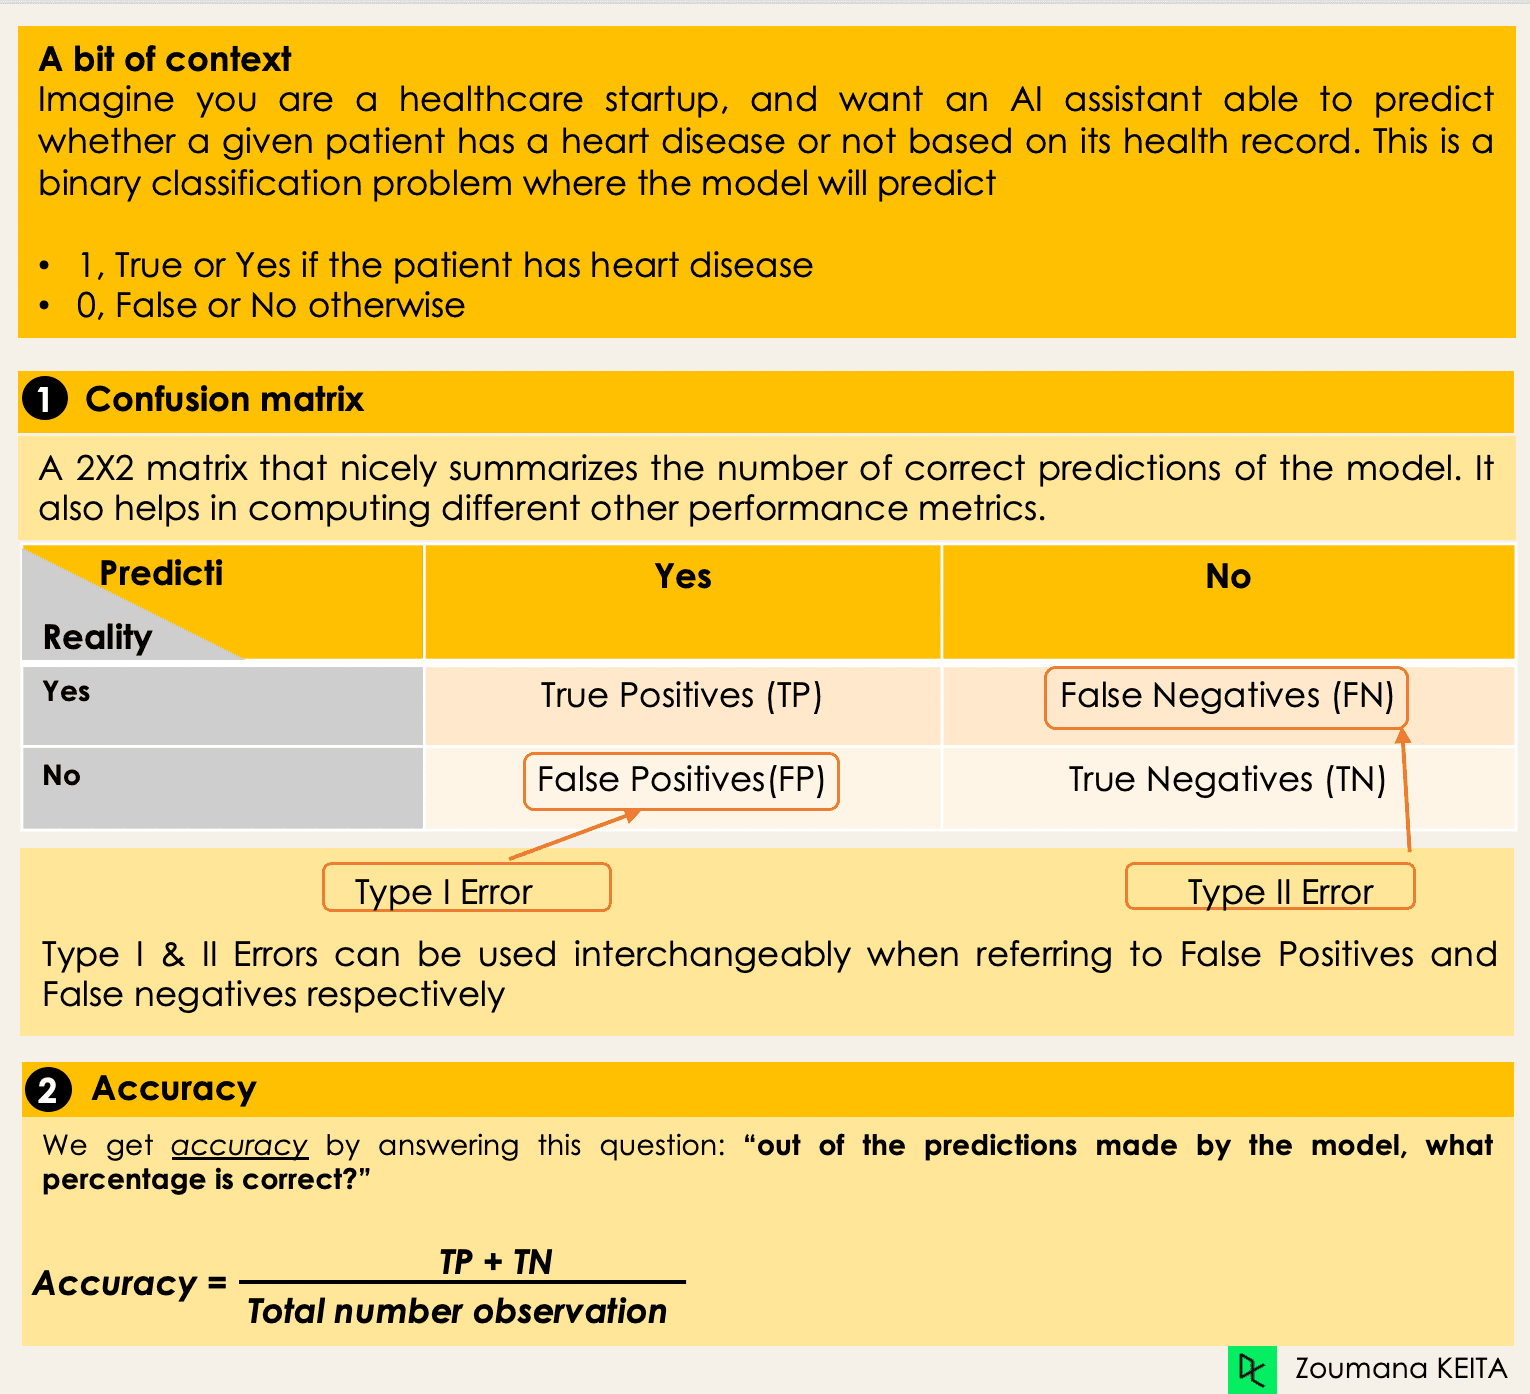

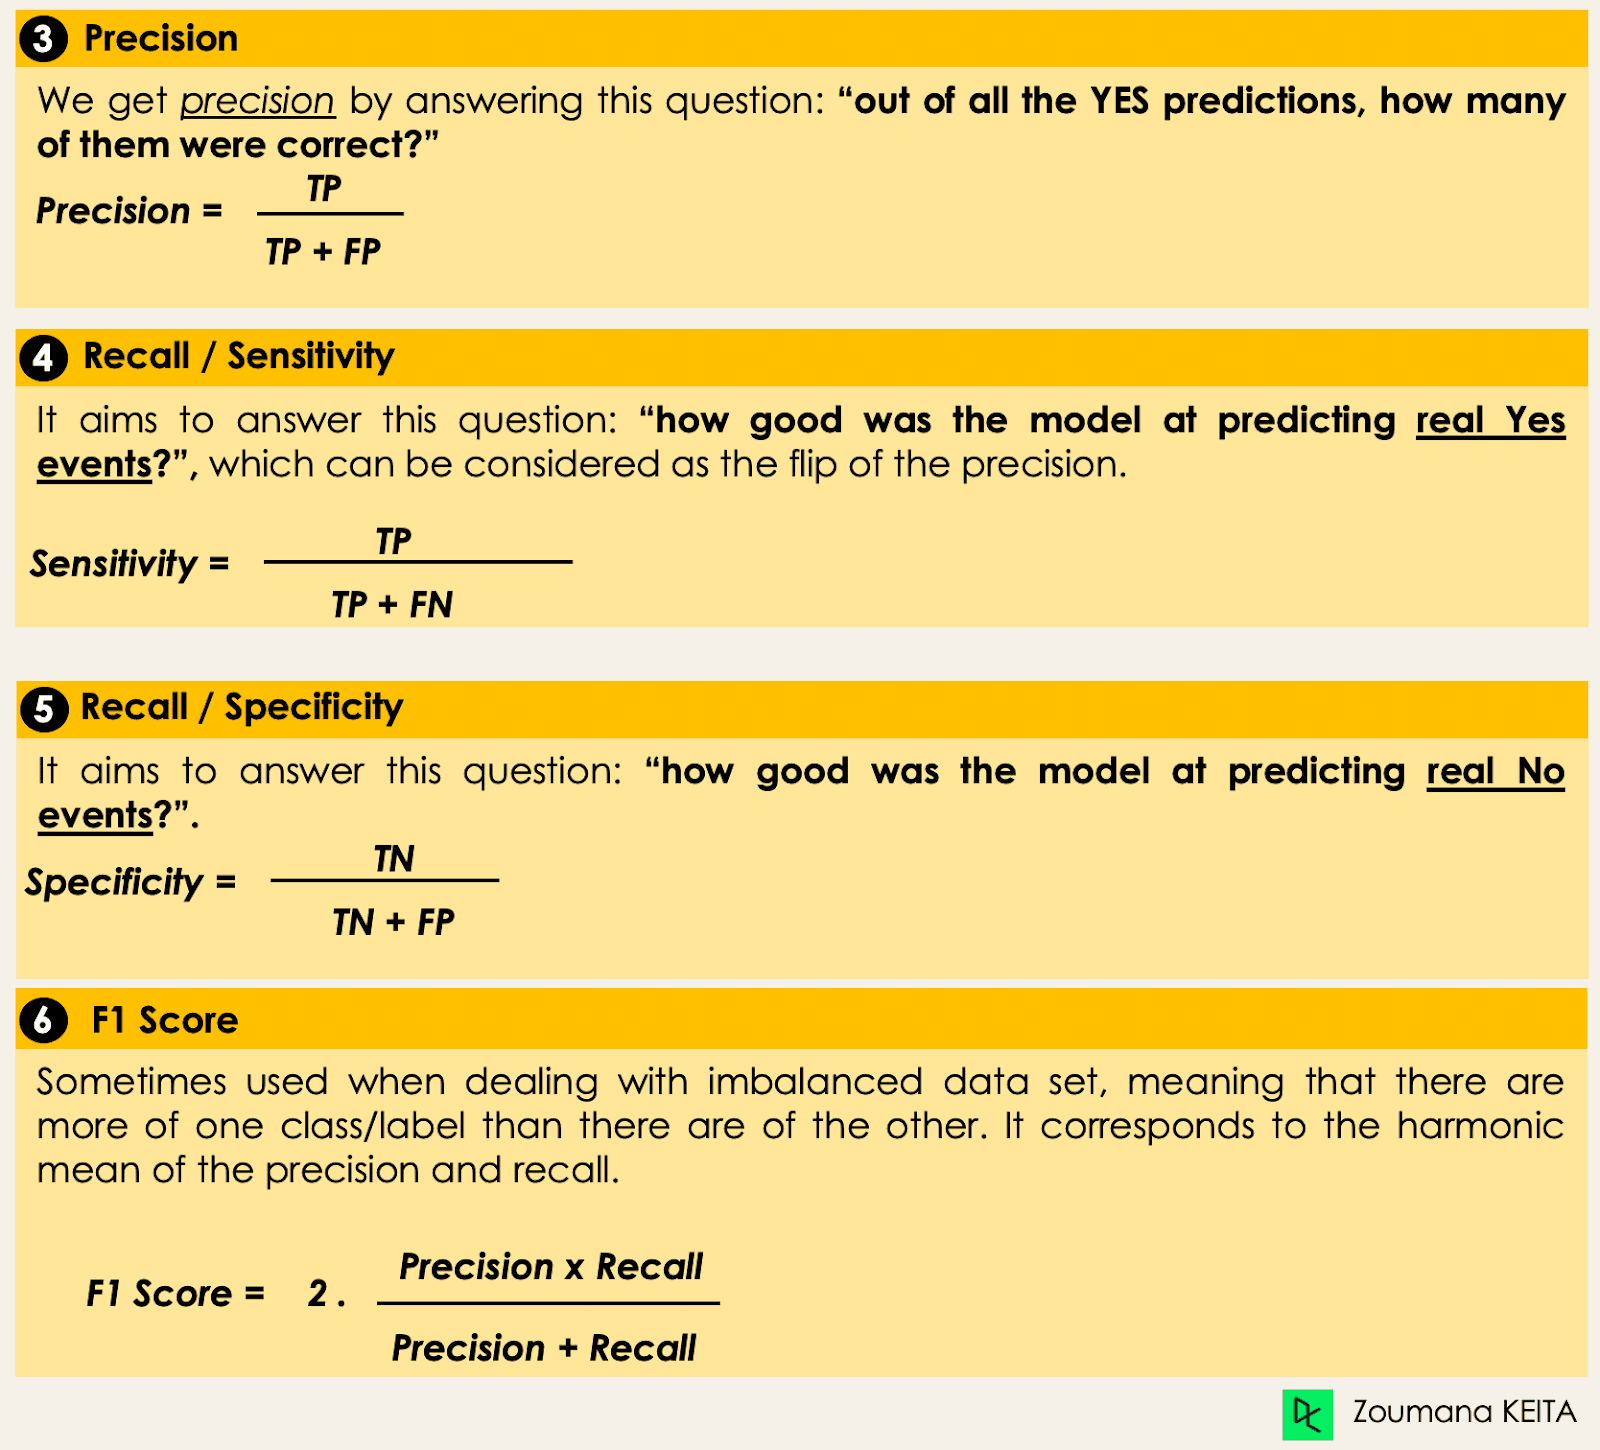

In [160]:
from sklearn.metrics import precision_score,recall_score, f1_score
pre = precision_score(y_train,y_pred, average="macro")
rec = recall_score(y_train, y_pred, average="macro")
f1 = f1_score(y_train,y_pred, average="macro")

print("Precision Score : ",pre)
print("Recall Score : ",rec)
print("F1 Score : ",f1)

y_score = cross_val_predict(sgd,X_train_new,y_train,cv=3)

Precision Score :  0.8420188277331135
Recall Score :  0.8367157974300831
F1 Score :  0.8345729402872261


<div class= "alert alert-danger">
    <h1><strong>Precision-Recall Curve</strong></h1>
 <ui><li>A precision-recall curve helps you decide a threshold on the basis of the desirable values of precision and recall. It also comes in handy to compare different model performance by computing “Area Under the Precision-Recall Curve,” abbreviated as AUC.</li></ui>
    
    
<ui><li>Increasing precision reduces recall, and vice versa. This is called the precision/recall trade-of</li></ui>
    
    
<ui><li>To understand this trade-off, let’s look at how the SGDClassifier makes its classifica‐
tion decisions</li></ui>
</div>

In [171]:
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import LabelBinarizer

y_scores = cross_val_predict(sgd, X_train_new, y_train, cv=3, method='decision_function')
lb = LabelBinarizer()
y_train_binarized = lb.fit_transform(y_train)                

precisions = dict()
recalls = dict()
thresholds = dict()
for i in range(len(lb.classes_)):
    precisions[i], recalls[i], thresholds[i] = precision_recall_curve(y_train_binarized[:, i], y_scores[:, i])

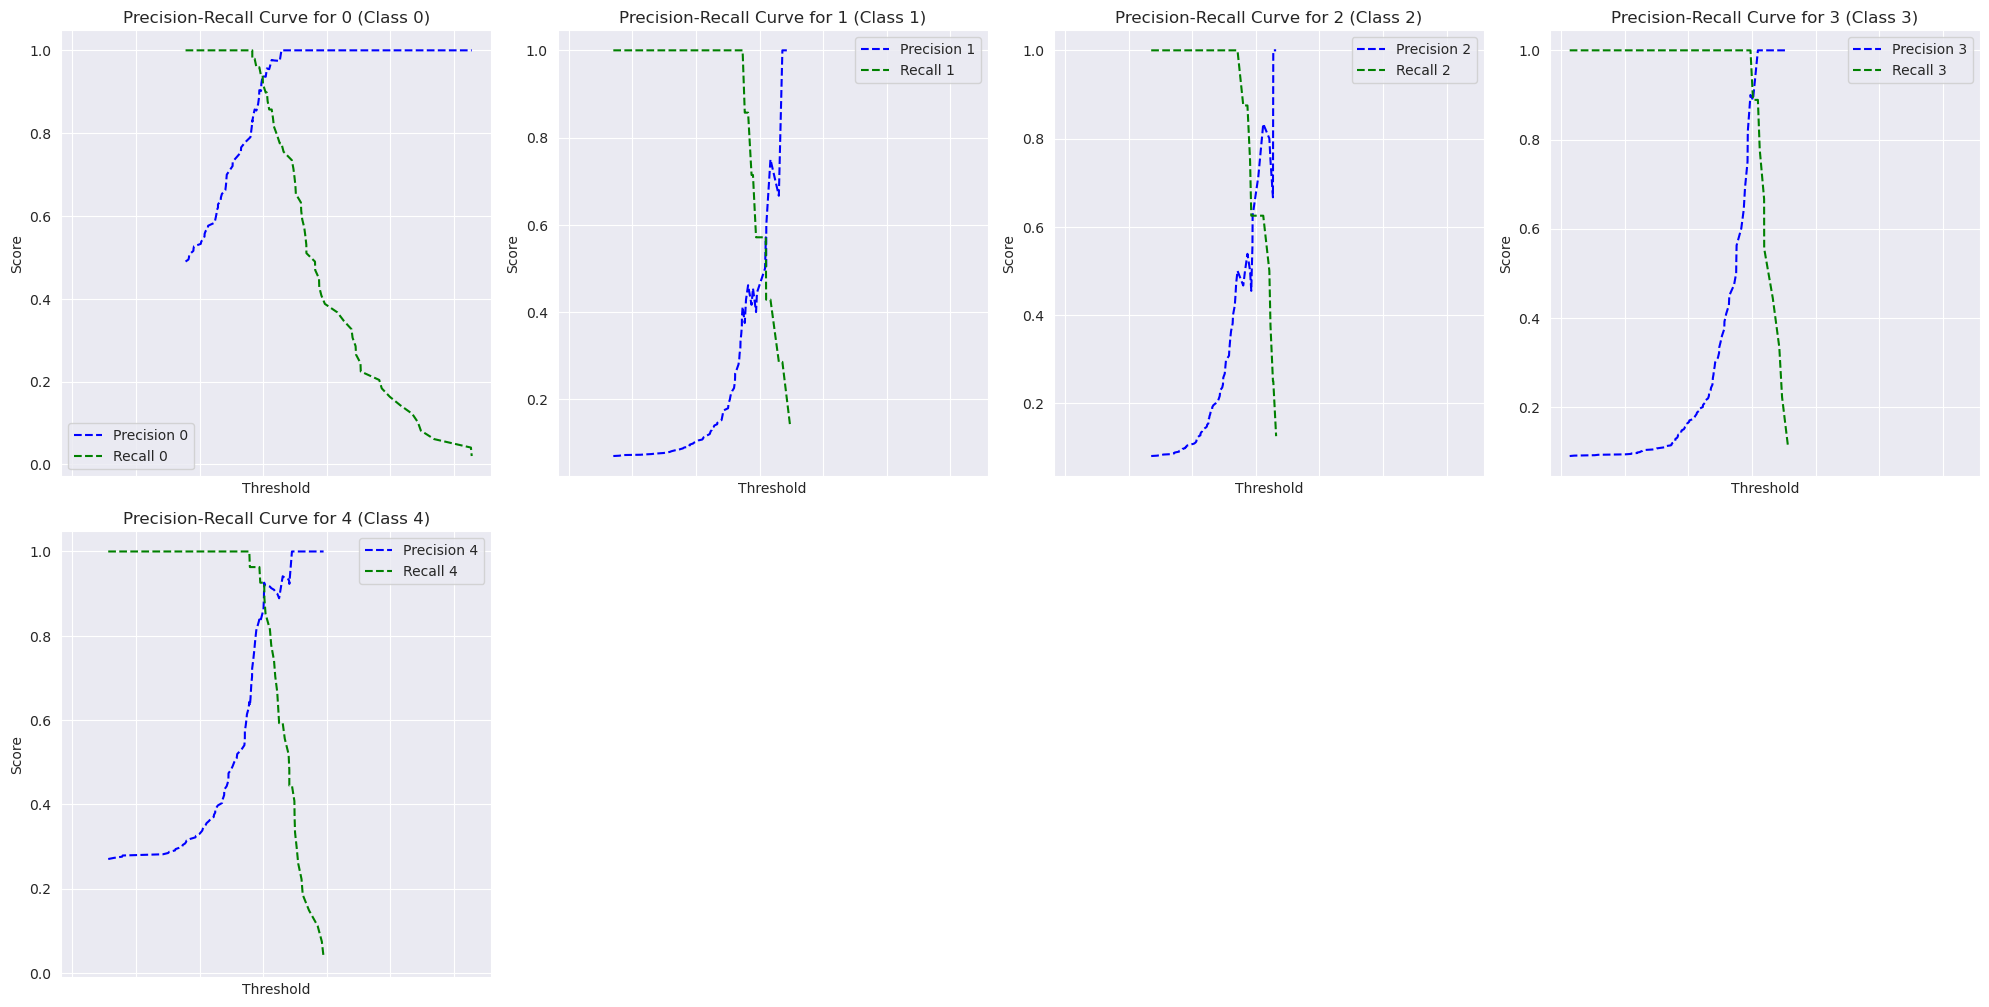

In [172]:
class_labels = lb.classes_

def plot_curve(precisions, recalls, thresholds, class_labels):
    num_classes = len(class_labels)
    fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20), sharex=True)

    for class_index, label in enumerate(class_labels):
        if class_index >= num_classes:
            break
        
        row = class_index // 4
        col = class_index % 4
        axes[row, col].plot(thresholds[class_index], precisions[class_index][:-1], "b--", label=f"Precision {label}")
        axes[row, col].plot(thresholds[class_index], recalls[class_index][:-1], "g--", label=f"Recall {label}")
        axes[row, col].set_title(f"Precision-Recall Curve for {label} (Class {class_index})")
        axes[row, col].legend()
        axes[row, col].set_xlabel("Threshold")
        axes[row, col].set_ylabel("Score")
        
    for class_index in range(num_classes, 16):
        row = class_index // 4
        col = class_index % 4
        fig.delaxes(axes[row, col])

    plt.tight_layout()
    plt.show()

plot_curve(precisions, recalls, thresholds, class_labels)


<div class = "alert alert-danger">
<hr><strong>The ROC Curve</strong><hr>
    <p>The receiver operating characteristic (ROC) curve is another common tool used with
binary classifiers. It is very similar to the precision/recall curve, but instead of plot‐
ting precision versus recall, the ROC curve plots the true positive rate (another name
for recall) against the false positive rate (FPR). The FPR is the ratio of negative instan‐
ces that are incorrectly classified as positive. It is equal to 1 – the true negative rate
(TNR), which is the ratio of negative instances that are correctly classified as negative.
The TNR is also called specificity. Hence, the ROC curve plots sensitivity (recall) ver‐
    sus 1 – specificity</p>
</div>

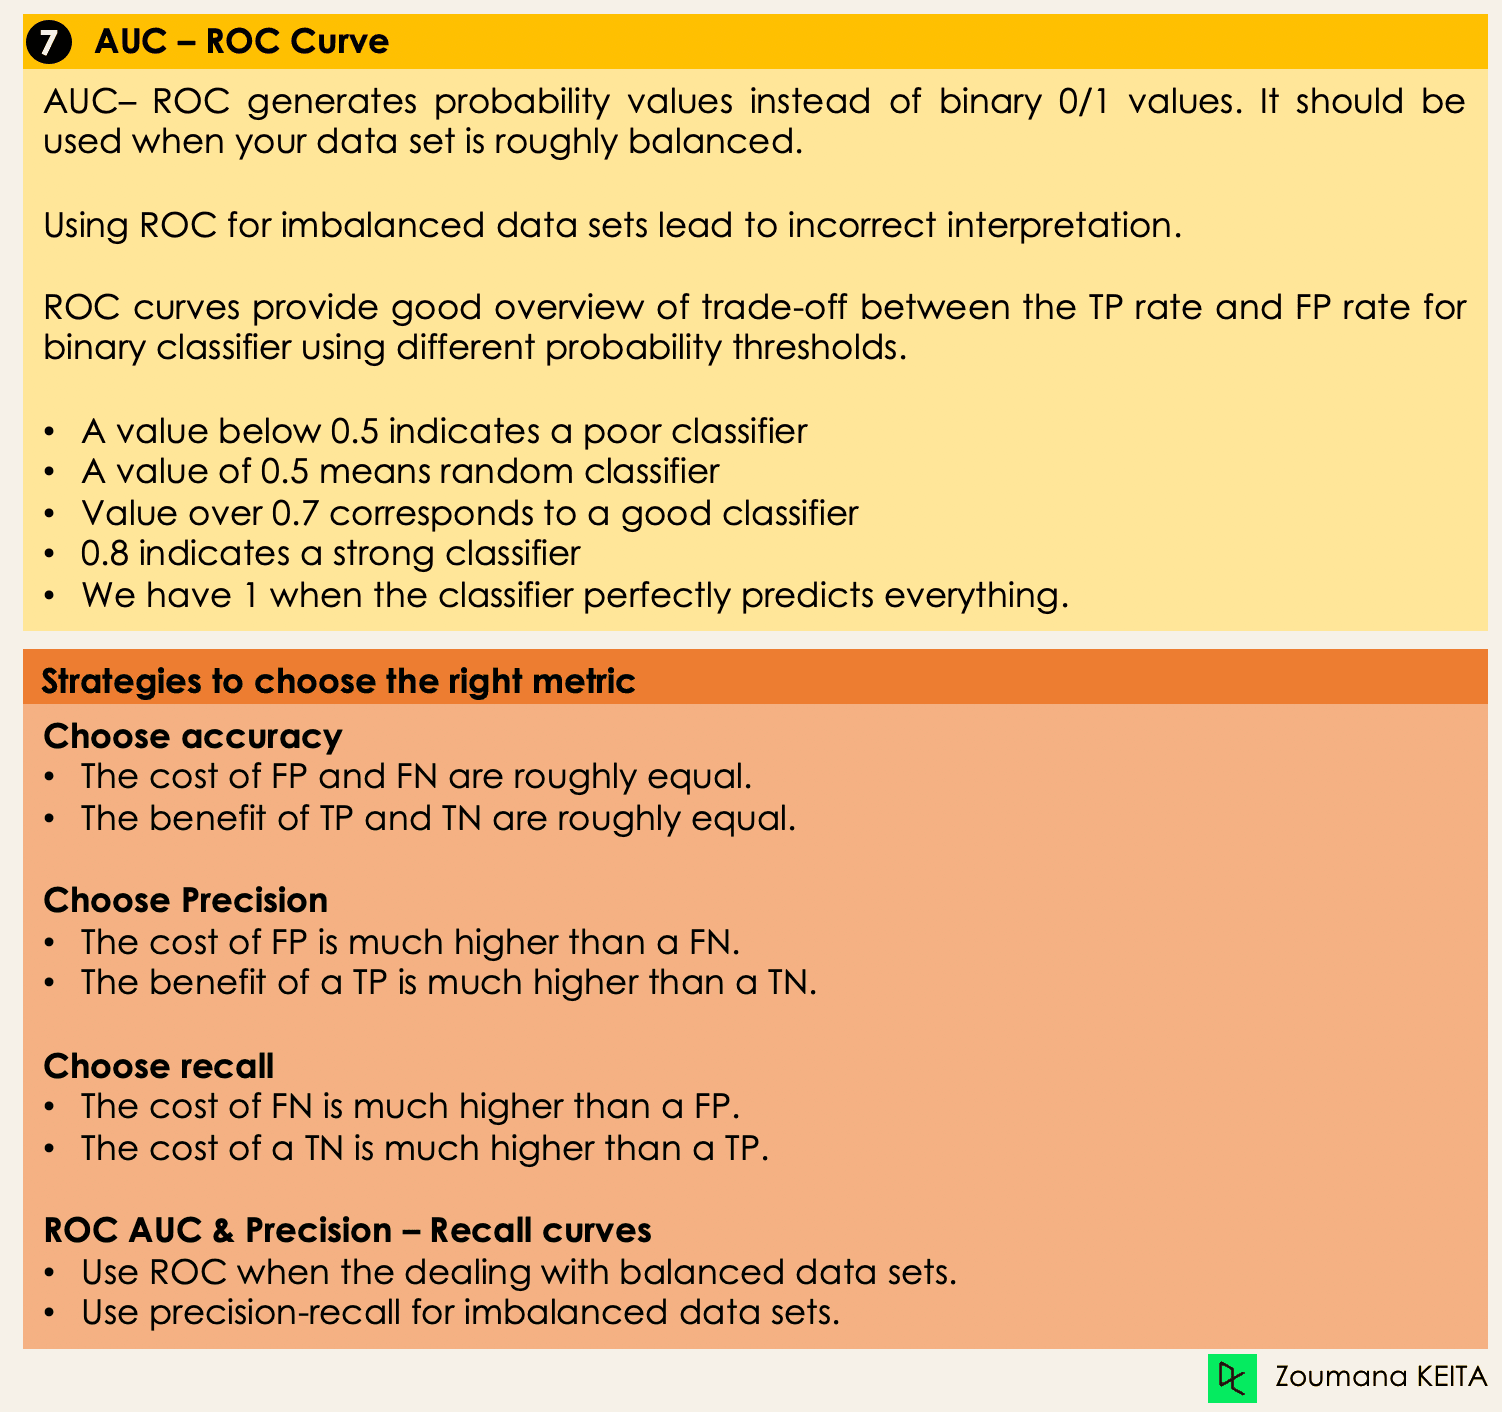

In [163]:
from sklearn.metrics import roc_curve

fpr = dict()
tpr = dict()
thresholds = dict()
for i in range(len(lb.classes_)):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_train_binarized[:, i], y_scores[:, i])

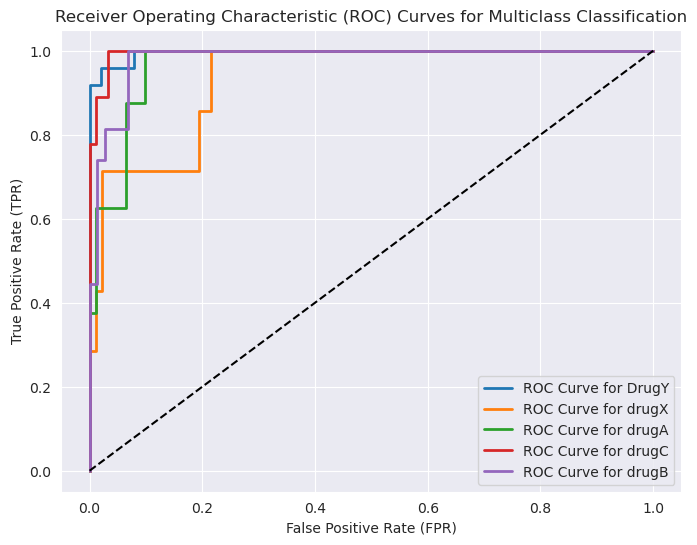

In [164]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
fpr = dict()
tpr = dict()
thresholds = dict()
for i in range(len(lb.classes_)):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_train_binarized[:, i], y_scores[:, i])

def plot_roc(fpr, tpr, class_labels):
    plt.figure(figsize=(8, 6))
    for class_index, label in enumerate(class_labels):
        plt.plot(fpr[class_index], tpr[class_index], linewidth=2, label=f"ROC Curve for {label}")
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title("Receiver Operating Characteristic (ROC) Curves for Multiclass Classification")
    plt.legend()
    plt.show()


class_labels = ['DrugY', 'drugX', 'drugA', 'drugC', 'drugB']
plot_roc(fpr, tpr, class_labels)


In [166]:
from sklearn.metrics import roc_auc_score,accuracy_score
roc_auc_scores = dict()
for class_index, label in enumerate(class_labels):
    roc_auc_scores[label] = roc_auc_score(y_train_binarized[:, class_index], y_scores[:, class_index])

print(roc_auc_scores)

{'DrugY': 0.995998399359744, 'drugX': 0.9339477726574501, 'drugA': 0.96875, 'drugC': 0.9951159951159951, 'drugB': 0.9812278031456113}


<div class = "alert alert-danger">
<h1><strong>Is a Precision-Recall Curve Better Than a ROC Curve?</strong></h1>
- A ROC curve is similar to the PR curve but plots the True Positive Rate (TPR) vs the False Positive Rate (FPR) for different thresholds. We already know TPR, it is just another name for recall. So, let us focus on FPR, which signifies the number of misclassifications from the negative class.
    
</div>

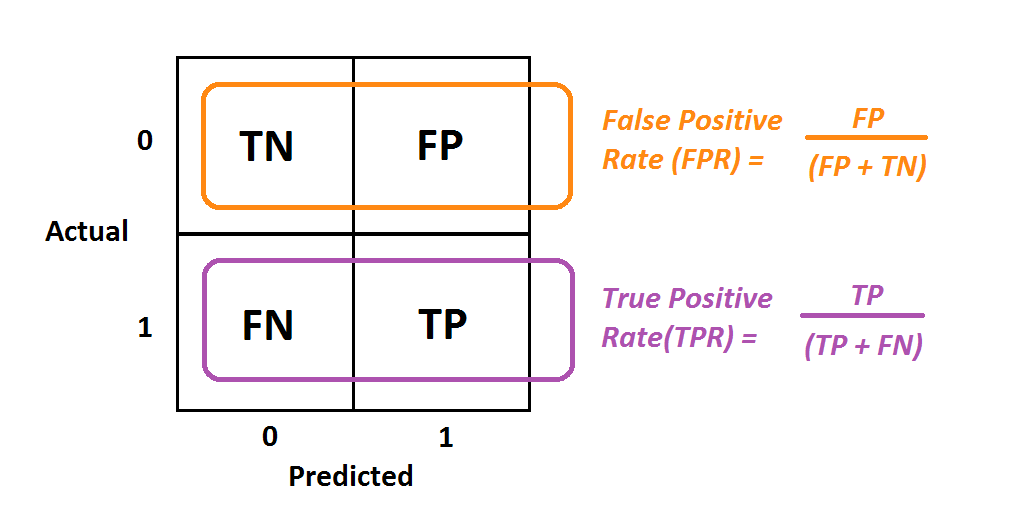

<div class = "alert alert-danger">
    <h1><strong>Why a PR curve is more informative comparatively?</strong></h1>
    
<ui><li>By now, we understand that the recall, aka TPR, is common between the PR curve and ROC curve; the prime difference is that of precision and FPR respectively.</li></ui>

<ui><li>This is because the P-R curve provides more meaningful insights about the class of interest as compared to the ROC curve.</li></ui>

<ui><li>On the other hand, using Precision as one of the metrics describes the model’s performance on the positive class</li></ui>

<ui><li>The second major drawback of the ROC curve is its immunity to imbalanced data. From the figure above, you can see that FPR is a negative class-only metric, meaning that the change in FP is expected to be proportional to the change in FP+TN (all negative instances). Thus if the distribution of the underlying data changes, the ROC doesn’t change significantly. This insensitivity to class distribution makes the PR curve a better bet over the ROC curve.</li></ui>
    
   Final Thoughts
Precision and recall are key evaluation metrics to measure the performance of machine learning classification models. However, the trade-off between the two depends on the business prerogative and is best resolved through the PR curve. 
</div>

<div class = "alert alert-danger">
    
<h1><strong>Multilabel Classification</strong></h1>
    <h3><strong>K-Nearest Neighbors</strong></h3>
The kNN algorithm can be considered a voting system, where the majority class label determines the class label of a new data point among its nearest ‘k’ (where k is an integer) neighbors in the feature space. 
    
</div>

Accuracy: 0.79
Precision: 0.7692640692640692
Recall: 0.7713624338624339
F1 Score: 0.749837601370174
Confusion Matrix:
[[36  0  3  1  2]
 [ 2 11  3  0  0]
 [ 0  0  8  0  0]
 [ 3  0  0  4  0]
 [ 3  3  1  0 20]]


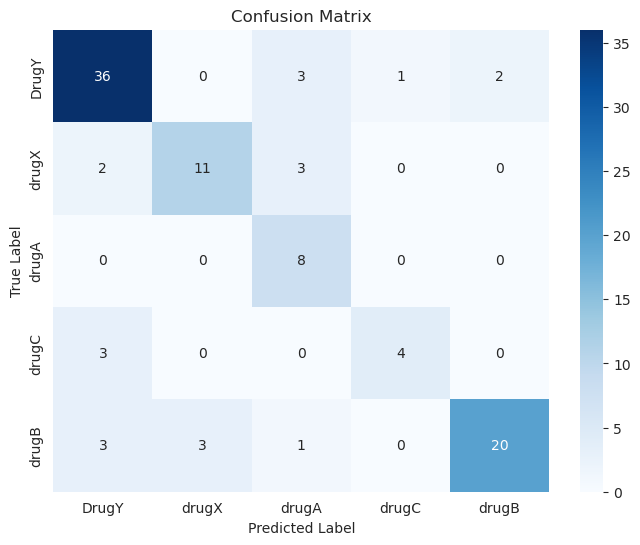

In [168]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=3)  
knn_classifier.fit(X_train_new, y_train)


y_pred = knn_classifier.predict(X_test_new)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

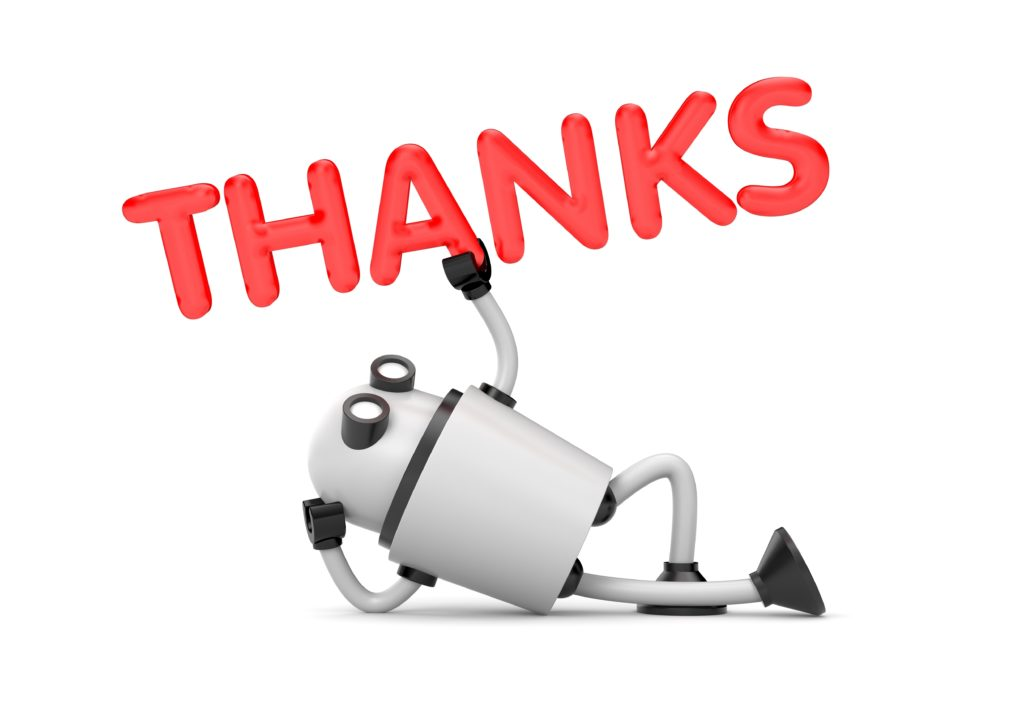